### 移動平均モデル　MA:Moving Average model

In [1]:
# 必要なライブラリーのインポート
import pandas as pd
import numpy as np

# 統計モデル
import statsmodels.api as sm

from matplotlib import pylab as plt
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

df = pd.read_csv("AirPassengers.csv", 
                   index_col="Month", 
                   parse_dates=True, 
                   dtype="float")
df =df.rename(columns={'#Passengers':'Passengers'})
# データの中身を確認
df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


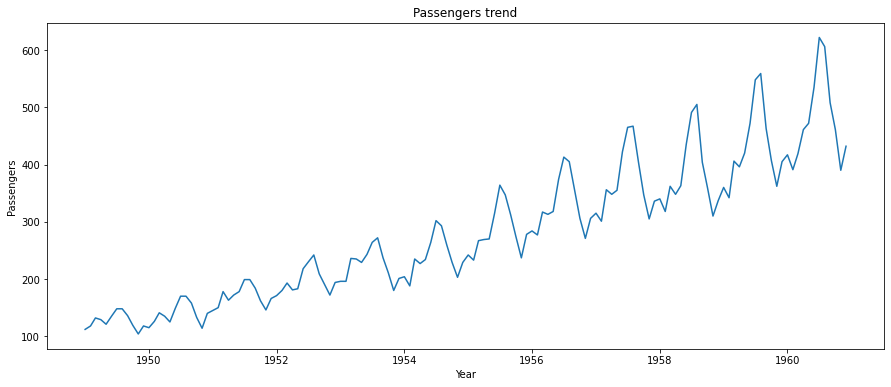

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(df["Passengers"])

ax1.set_title("Passengers trend")
ax1.set_xlabel("Year")
ax1.set_ylabel("Passengers")

plt.show()

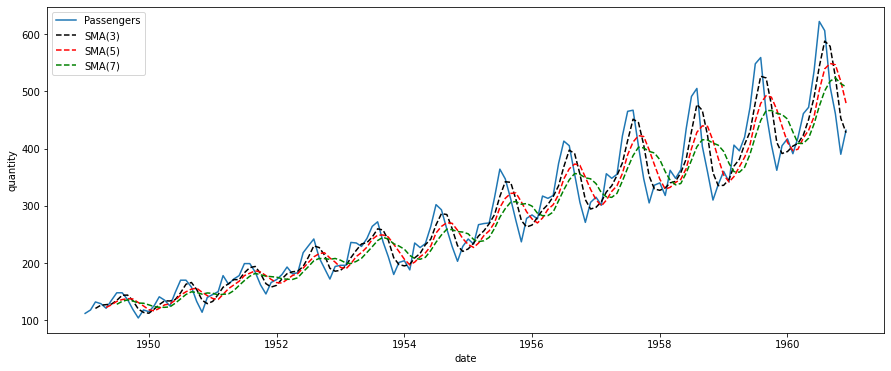

In [20]:
# 移動平均
df["3ma"]=df["Passengers"].rolling(3).mean().round(1)
df["5ma"]=df["Passengers"].rolling(5).mean().round(1)
df["7ma"]=df["Passengers"].rolling(7).mean().round(1)

# 可視化
plt.plot(df["Passengers"], label="Passengers")
plt.plot(df["3ma"], "k--", label="SMA(3)")
plt.plot(df["5ma"], "r--", label="SMA(5)")
plt.plot(df["7ma"], "g--", label="SMA(7)")
plt.xlabel("date")
plt.ylabel("quantity")
plt.legend()

plt.show()

In [3]:
res = sm.tsa.stattools.adfuller(df.Passengers)
print('p-value = {:.4}'.format(res[1]))

p-value = 0.9919


ADF検定より，P値が0.05以上であることがわかった→帰無仮説(定常性を持たない)を棄却されず，この時系列データは定常性を持つとは言えないということがわかりました

### 自己回帰モデル　AR　Autoregressive Integrated Moving model

C:\Users\moriyama shiko\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


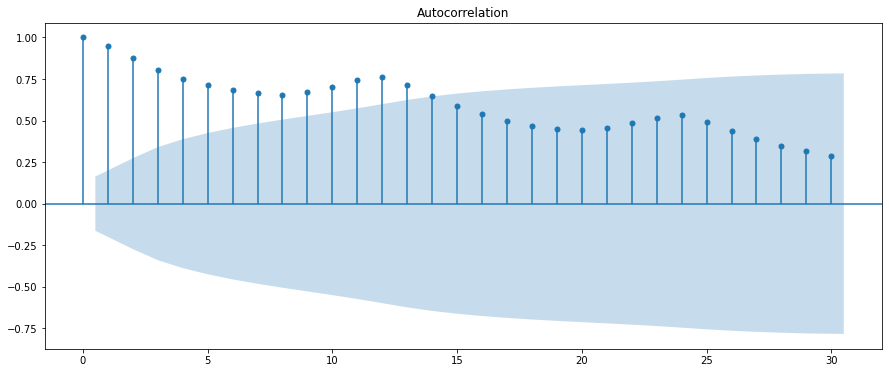

In [24]:
# 自己相関を求める
df_acf = sm.tsa.stattools.acf(df["Passengers"], nlags=30)

#  自己相関のグラフ
fig = sm.graphics.tsa.plot_acf(df["Passengers"], lags=30)

<Figure size 864x576 with 0 Axes>

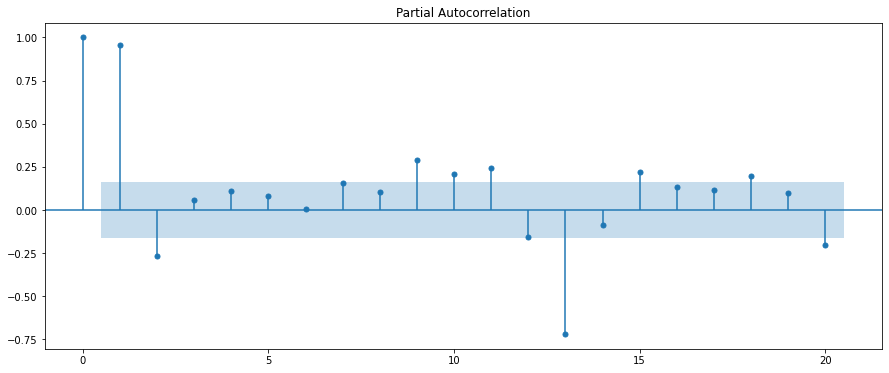

In [25]:
# 偏自己相関を求める
df_pacf = sm.tsa.stattools.pacf(df["Passengers"], nlags=20, method='ols')

# 偏自己相関を可視化する
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_pacf(df["Passengers"], lags=20)

偏自己相関値より，t-1とt－12で強い相関があることが確認できる．→先月と1年周期で強い相関
### トレンド，季節性，ランダム性を確認

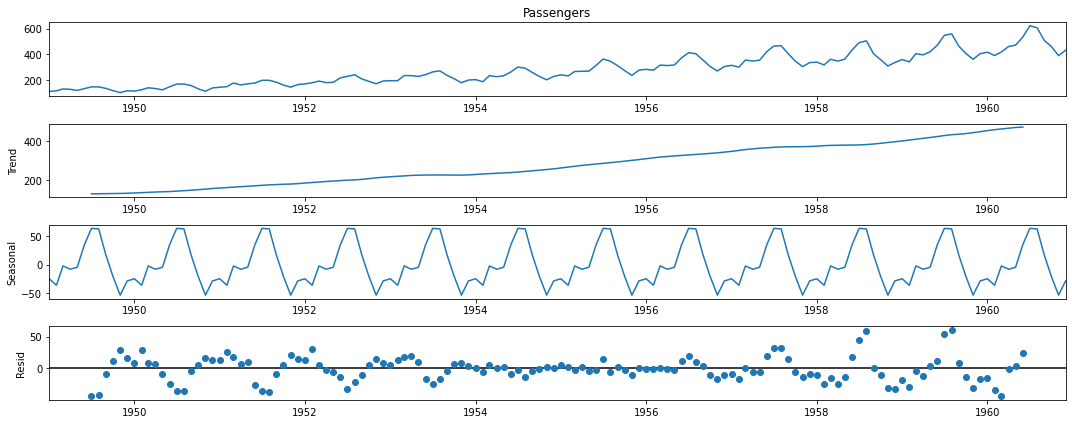

In [30]:
res = sm.tsa.seasonal_decompose(df["Passengers"])
fig = res.plot()

### AR 推定

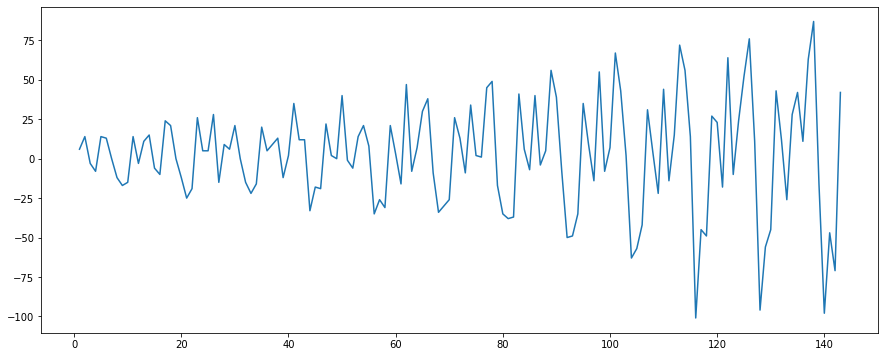

In [14]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

target = df["Passengers"].diff().values
plt.plot(target)


In [16]:
sel = ar_select_order(df, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
res.summary()

C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                    AutoReg(13)   Log Likelihood                -497.994
Method:               Conditional MLE   S.D. of innovations             10.832
Date:                Tue, 07 Dec 2021   AIC                           1025.988
Time:                        10:40:42   BIC                           1069.116
Sample:                    02-01-1950   HQIC                          1043.513
                         - 12-01-1960                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.1490      2.857      1.802      0.072      -0.451      10.749
Passengers.L1      0.7608      0.070     10.885      0.000       0.624       0.898
Passengers.L2     -0.0853      0.069     -1.229      0.219      -0.221       0.051
Passengers.L3      0.0442      0.070      0.632      0.527      -0.093       0.181
Passengers.L4     -0.0418      0.071     -0.589      0.556      -0.181       0.097
Passengers.L5      0.0543      0.071      0.764      0.445      -0.085       0.194
Passengers.L6     -0.0528      0.070     -0.757      0.449      -0.189       0.084
Passengers.L7      0.0332      0.069      0.480      0.631      -0.102       0.169
Passengers.L8     -0.0997      0.069     -1.435      0.151      -0.236       0.037
Passengers.L9      0.1456      0.071      2.058      0.040       0.007       0.284
Passengers.L10    -0.1259      0.072     -1.742      0.081      -0.268       0.016
Passengers.L11     0.1436      0.073      1.968      0.049       0.001       0.287
Passengers.L12     0.9071      0.074     12.291      0.000       0.762       1.052
Passengers.L13    -0.6660      0.079     -8.454      0.000      -0.820      -0.512
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0548           -0.0000j            1.0548           -0.5000
AR.2            -0.8786           -0.4917j            1.0068           -0.4188
AR.3            -0.8786           +0.4917j            1.0068            0.4188
AR.4            -0.4986           -0.8622j            0.9960           -0.3335
AR.5            -0.4986           +0.8622j            0.9960            0.3335
AR.6             0.0053           -1.0015j            1.0015           -0.2492
AR.7             0.0053           +1.0015j            1.0015            0.2492
AR.8             0.4932           -0.8638j            0.9947           -0.1674
AR.9             0.4932           +0.8638j            0.9947            0.1674
AR.10            0.8588           -0.4933j            0.9903           -0.0830
AR.11            0.8588           +0.4933j            0.9903            0.0830
AR.12            0.9954           -0.0000j            0.9954           -0.0000
AR.13            1.4614           -0.0000j            1.4614           -0.0000
------------------------------------------------------------------------------
"""

No handles with labels found to put in legend.


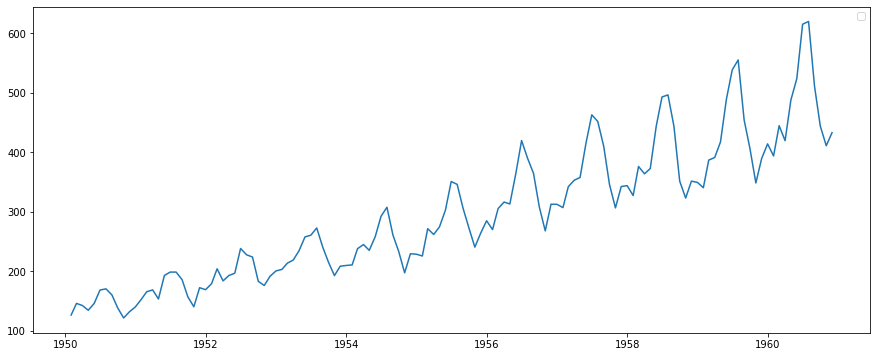

In [36]:
t = len(df)
fig = res.plot_predict(1,t-1)

C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


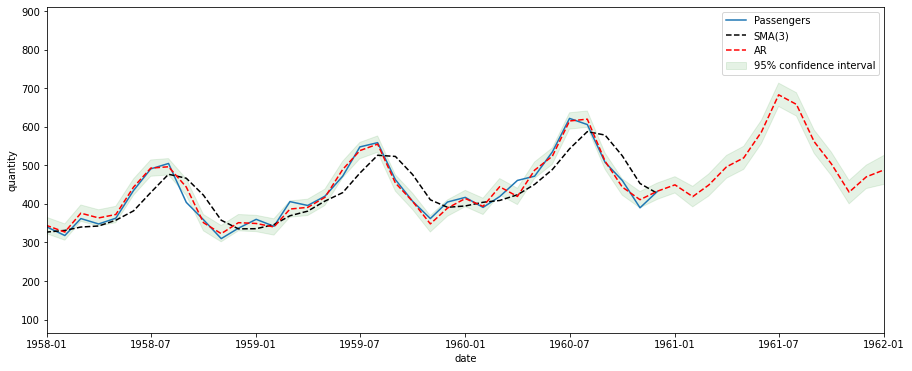

In [109]:
import datetime
predict=res.get_prediction(start='1951-1',end='1964-1')
predict_conf=predict.conf_int()
predict_mean=predict.predicted_mean
# 移動平均
df["3ma"]=df["Passengers"].rolling(3).mean().round(1)
# 可視化
plt.plot(df["Passengers"], label="Passengers")
plt.plot(df["3ma"], "k--", label="SMA(3)")
plt.plot(predict_mean,"r--",label='AR')
plt.fill_between(predict_conf.index,predict_conf.iloc[:,0], predict_conf.iloc[:,1], color="green", alpha=.1, label="95% confidence interval") 

plt.xlabel("date")
plt.ylabel("quantity")
plt.legend()
plt.subplot().set_xlim(datetime.datetime(1958,1,1), datetime.datetime(1962,1,1)) 
plt.show()

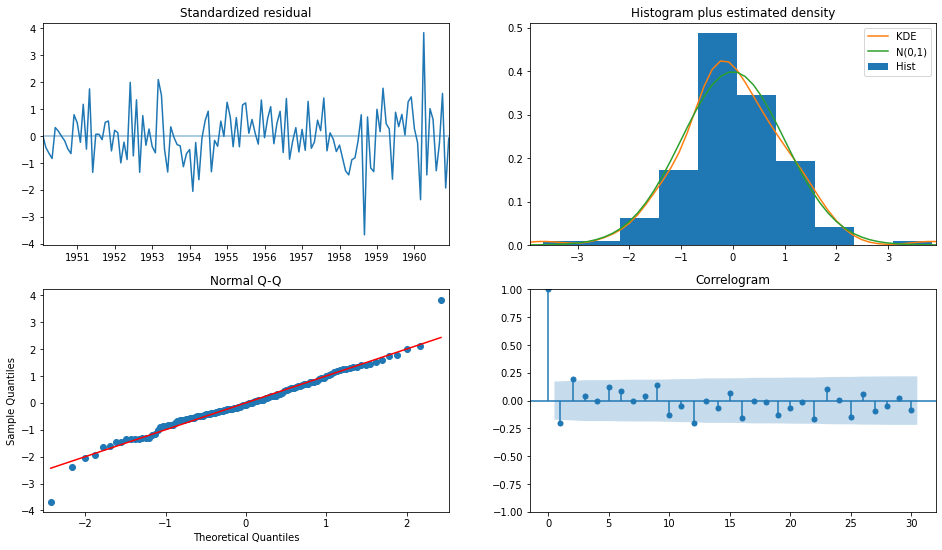

In [110]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(lags=30, fig=fig)

### トレンドが存在する非定常な時系列ですが，トレンドは常時右肩上がりであり，比較的単純な時系列データなのでARモデルによってもある程度分布に沿った式を取得することができている
###　ARとMAは定常な時系列が前提のモデルなので，ARとMA＋階差を加えたARIMAモデルを考えてみます
###　ARIMAモデルはARMAモデルを非定常過程に対応したものです。 研究用としては以前から用いられるモデルですが、2010年代頃からは実用化の流れも活発化しています。

ARIMAモデルはARMAモデルに加えて、前後のデータ間の差分dを定義します。

逆に言うと、非定常データから差分をとって定常データになるような値が差分dとなります。

このモデルはARIMA(p,d,q)と表すことができます。

### ARIMA

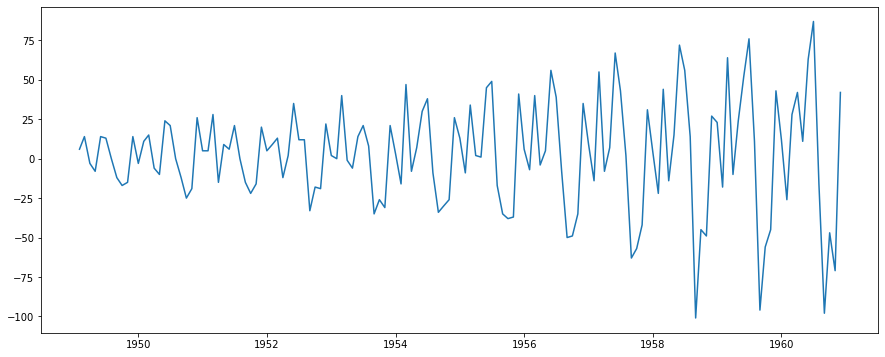

In [154]:
diff =df -df.shift()
plt.plot(diff.iloc[:,0])
diff = diff.dropna()

In [119]:
# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff.iloc[:,0], ic='aic', trend='n')

C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fou

In [120]:
resDiff

{'aic':              0            1            2
 0  1359.974488  1344.158426  1344.171457
 1  1348.475147  1341.714903  1333.117681
 2  1343.647693  1326.171592  1302.295003
 3  1342.191045  1327.437674  1325.103790
 4  1335.698515  1331.618613  1321.662743,
 'aic_min_order': (2, 2)}

C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationar

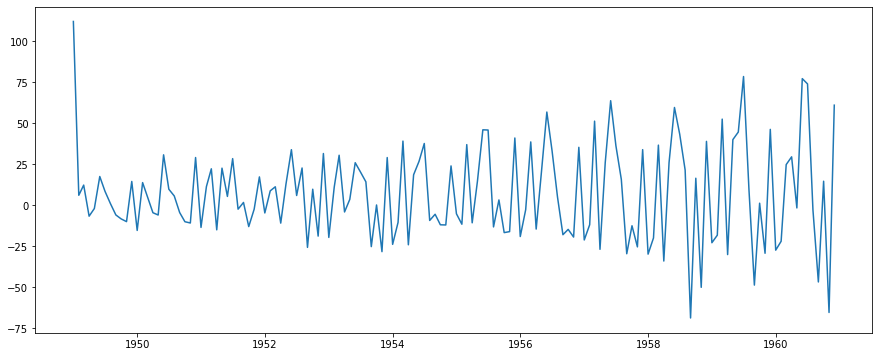

In [129]:
# P-3, q=2 が最善となったので、それをモデル化
from statsmodels.tsa.arima.model import ARIMA
ARIMA_3_1_2 = ARIMA(df['Passengers'], order=(3, 1, 2)).fit()
resid=ARIMA_3_1_2.resid
plt.plot(resid)

C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


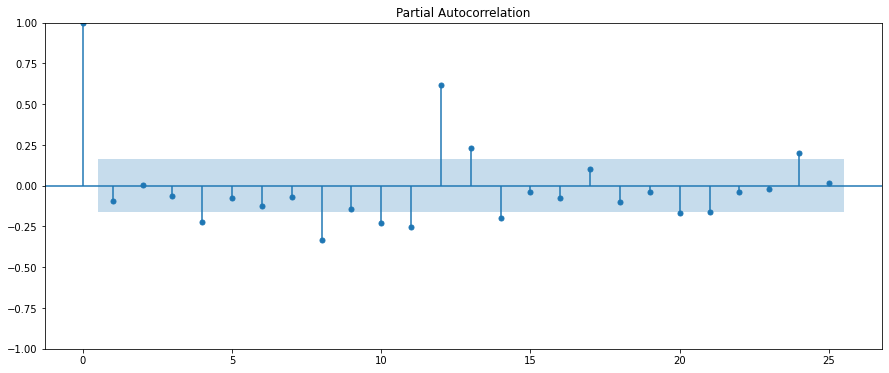

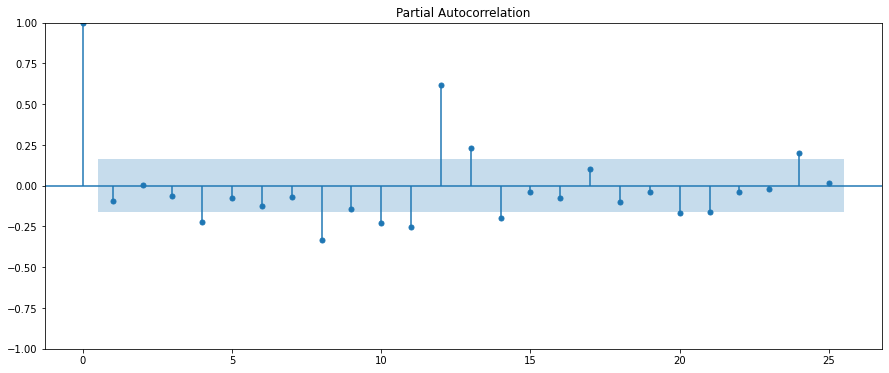

In [130]:
from statsmodels.graphics import tsaplots 
tsaplots.plot_pacf(resid, lags=25)

C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\A518804\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


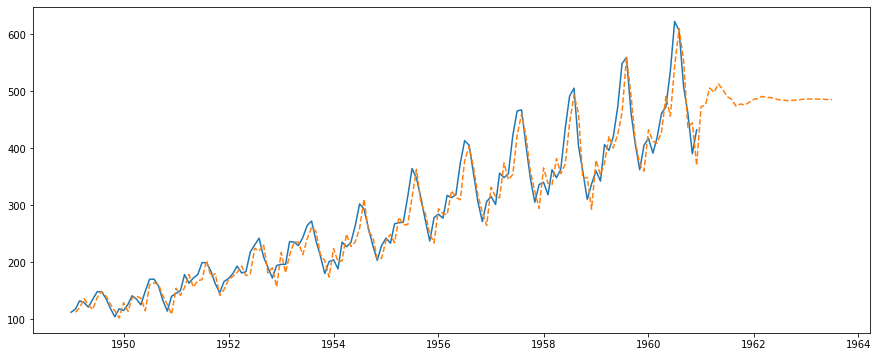

In [153]:
arima_model = ARIMA(df['Passengers'], order=(6, 1, 2)).fit()
arima_predict = arima_model.predict(1,t+30)

plt.plot(df['Passengers'], label='observation')
plt.plot(arima_predict, '--', label='forcast')


### 計算結果の残差の自己相関分布より，12ケ月周期で高い自己相関の残差が生じてしまっている→季節性が考慮しきれていない
###　予測結果からもわかるように，1961年以降の分布はほとんど振動せず定常になってしまっている
